In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(legacy='1.25')

<h1>Задание 1</h1>

In [79]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

1. Изучите стоимости недвижимости

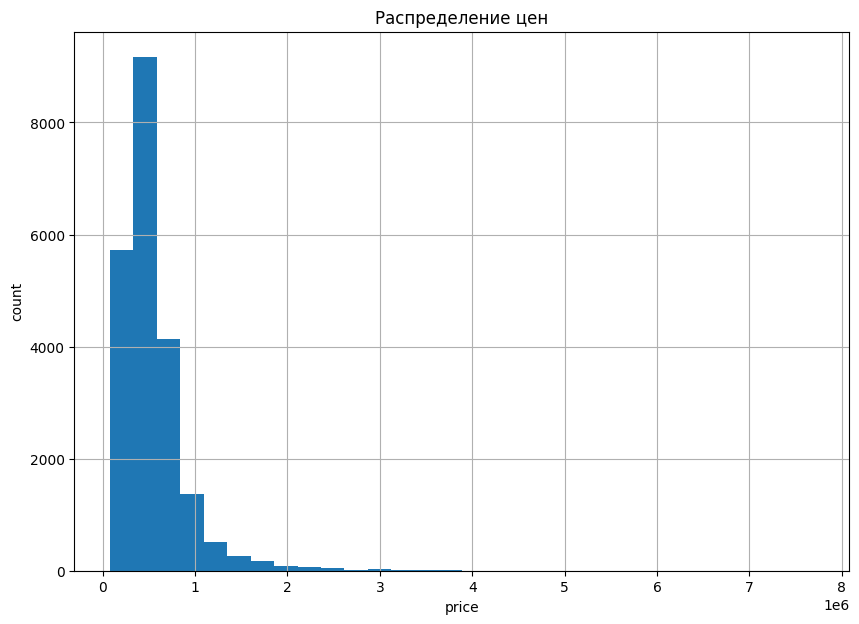

In [81]:
plt.figure(figsize=(10, 7))

df['price'].hist(density=False, bins=30)

plt.xlabel('price')
plt.ylabel('count')
plt.title('Распределение цен')
plt.show()

Получаем довольно неплохое распределение, определим метрики

In [82]:
price_mean = round(df['price'].mean(), 2)
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

price_mean, price_median, price_mode

(540088.14, 450000.0, 350000.0)

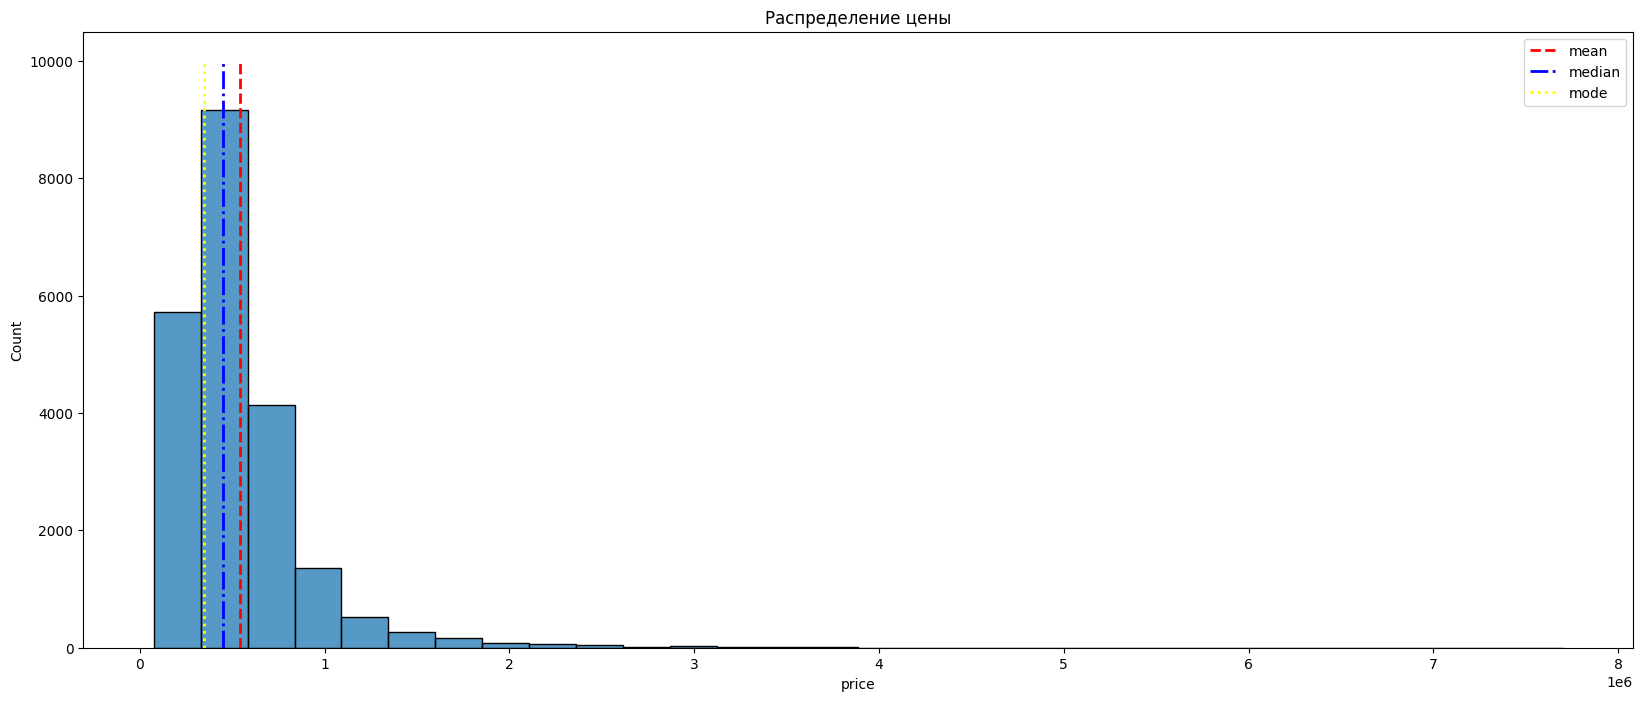

In [83]:
plt.figure(figsize=(20, 8))

sns.histplot(df['price'], bins=30)

y = np.linspace(0, 10000, 2)
plt.plot([price_mean]*2, y, label='mean', linestyle='--', linewidth=2, color='red')
plt.plot([price_median]*2, y, label='median', linestyle='-.', linewidth=2, color='blue')
plt.plot([price_mode]*2, y, label='mode', linestyle=':', linewidth=2, color='yellow')

plt.title("Распределение цены")
plt.legend()
plt.show()

Есть значения, сильно превосходящие медиану и среднее. Возможно - единичные цены для очень дорогих домов. Возможно - выбросы. Сравним средние метрики датафрейма с ценами до 3 млн. и предполагаемых выбросов

In [84]:
df_to_check_metrics = df[df['price'] > 3_000_000].describe().iloc[1]
df_old_metrics = df[df['price'] <= 3_000_000].describe().iloc[1]

df_check = pd.concat([df_to_check_metrics, df_old_metrics], axis=1, keys=['big_values', 'all_values'])
df_check['diff_%'] = round((df_check['big_values'] - df_check['all_values']) / df_check['all_values'] * 100, 2)
df_check

,big_values,all_values,diff_%
id,4.589311e+09,4.580283e+09,0.20
price,3.910794e+06,5.330554e+05,633.66
bedrooms,4.600000e+00,3.368277e+00,36.57
bathrooms,4.505556e+00,2.109769e+00,113.56
sqft_living,6.255778e+03,2.071187e+03,202.04
sqft_lot,2.371767e+04,1.508900e+04,57.19
floors,1.877778e+00,1.493509e+00,25.73
waterfront,4.444444e-01,6.630193e-03,6603.34
view,2.666667e+00,2.292285e-01,1063.32
condition,3.444444e+00,3.409356e+00,1.03


id - Уникальный ID для каждого дома<br>
date - Дата продажи дома<br>
price - Стоимость продажи дома<br>
bedrooms - Кол-во спален<br>
bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)<br>
sqft_living - Кв. метры жилые<br>
sqft_lot - Кв. метры общие<br>
floors - Кол-во этажей<br>
waterfront - Есть набержная или нет<br>
view - Значение от 0 до 4 насколько хороший вид<br>
condition - Значение от 1 до 5 насколько хорошее состояние<br>
grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна<br>
sqft_above - Кв. метры дома, которые находятся выше земли<br>
sqft_basement - Кв. метры дома, которые находятся ниже земли<br>
yr_built - Год постройки дома<br>
yr_renovated - Год ремонта дома<br>
zipcode - Индекс<br>
lat - Широтма<br>
long - Долгота<br>
sqft_living15 - Кв. метры жилой площади у 15 соседей<br>
sqft_lot15 - Кв. метры общей площади у 15 соседей<br>

Исходя из полученной таблицы - можно сделать вывод о том, что данные значения реальные, так как по процентам большинство условий в данной категории, действительно, лучше

2. Изучите распределение квадратуры жилой площади

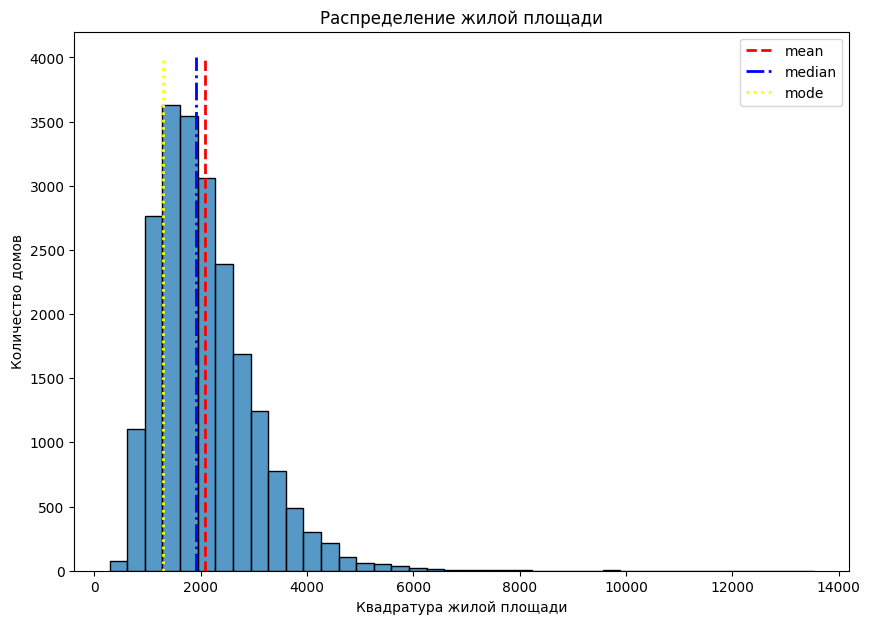

In [85]:
plt.figure(figsize=(10, 7))

sqft_living_mean = round(df['sqft_living'].mean(), 2)
sqft_living_median = df['sqft_living'].median()
sqft_living_mode = df['sqft_living'].mode()[0]

sns.histplot(df['sqft_living'], bins=40)

y = np.linspace(0, 4000, 2)
plt.plot([sqft_living_mean]*2, y, label='mean', linestyle='--', linewidth=2, color='red')
plt.plot([sqft_living_median]*2, y, label='median', linestyle='-.', linewidth=2, color='blue')
plt.plot([sqft_living_mode]*2, y, label='mode', linestyle=':', linewidth=2, color='yellow')

plt.xlabel('Квадратура жилой площади')
plt.ylabel('Количество домов')
plt.title("Распределение жилой площади")
plt.legend()
plt.show()

Распределение очень похоже на распределение цены. Весьма вероятно, что у этих двух признаков - сильная прямая корелляция

3. Изучите распределение года постройки

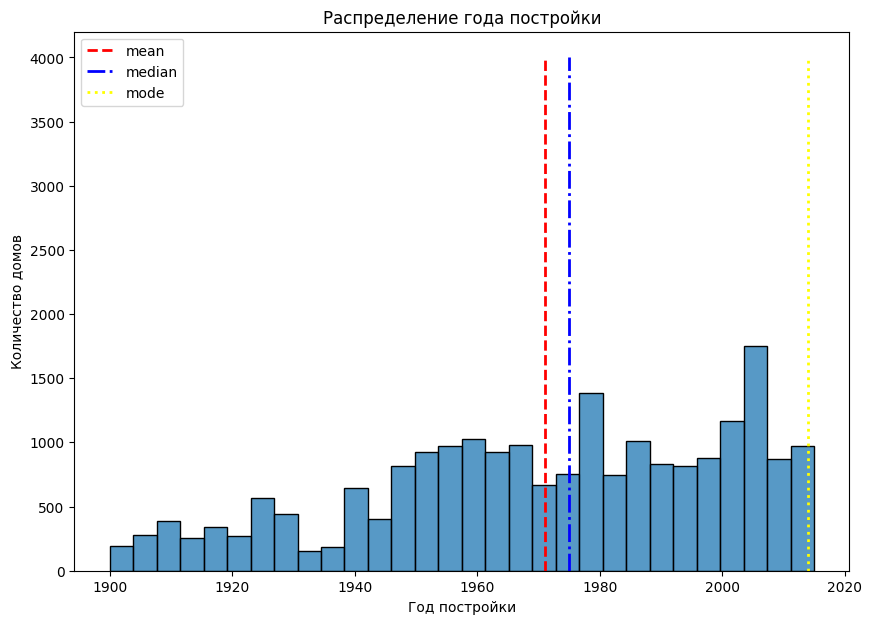

In [86]:
plt.figure(figsize=(10, 7))

yr_built_mean = round(df['yr_built'].mean(), 2)
yr_built_median = df['yr_built'].median()
yr_built_mode = df['yr_built'].mode()[0]

sns.histplot(df['yr_built'], bins=30)

y = np.linspace(0, 4000, 2)
plt.plot([yr_built_mean]*2, y, label='mean', linestyle='--', linewidth=2, color='red')
plt.plot([yr_built_median]*2, y, label='median', linestyle='-.', linewidth=2, color='blue')
plt.plot([yr_built_mode]*2, y, label='mode', linestyle=':', linewidth=2, color='yellow')

plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.title("Распределение года постройки")
plt.legend()
plt.show()

Тяжело сделать какие-либо выводы. Посмотрим на свзяь с ценой

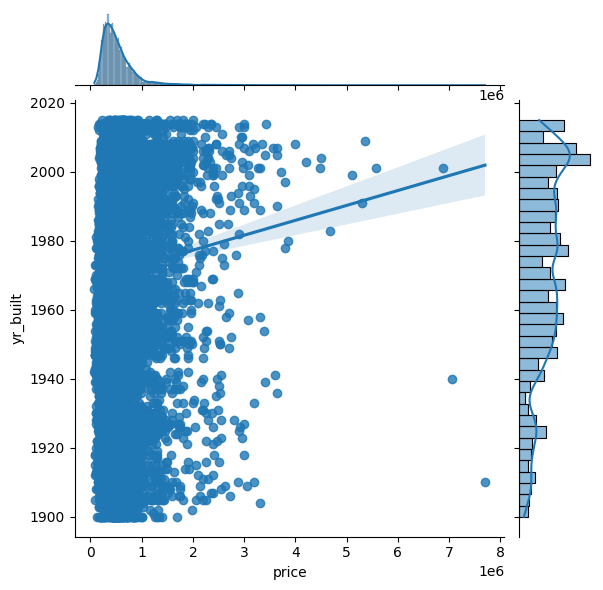

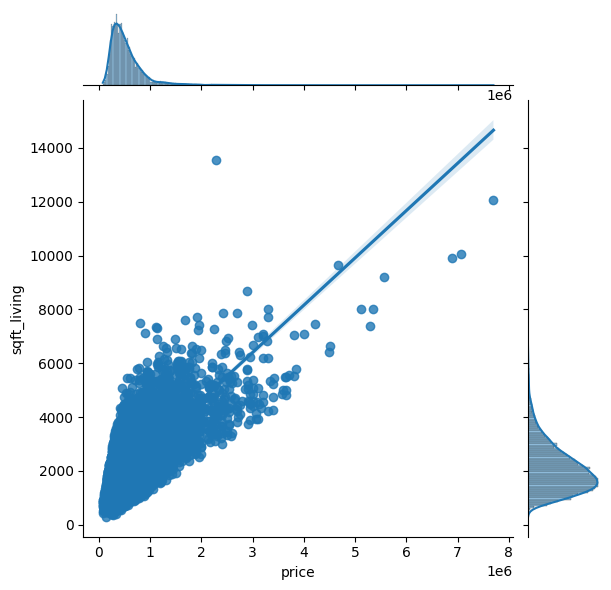

In [87]:
grid_yr = sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg')
grid_sq_live = sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.show()

Действительно, в случае с годом постройки - график больше похож на набор случайных точек. А в случае с площадью - есть что-то похожее на линейную связь

<h1>Задание 2</h1>

1. Изучите распределение домов от наличия вида на набережную

У нас есть столбец с наличием набережной. Проверим, связаны ли столбцы view и waterfront

In [88]:
df[df['waterfront'].eq(0)].shape[0], df[df['view'].eq(0)].shape[0]

(21450, 19489)

Тогда вопрос, скорее всего, именно про распределение оценки вида на набережную

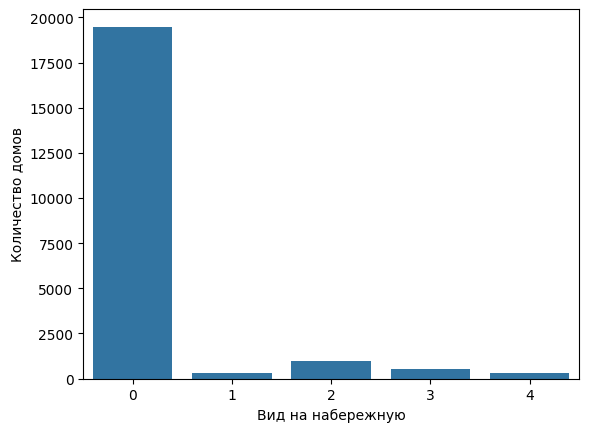

In [89]:
views = df['view'].value_counts()
sns.barplot(x=views.index, y=views.values)

plt.xlabel('Вид на набережную')
plt.ylabel('Количество домов')
plt.show()

Понятно, что большинство домов у нас представлено с нулевой оценкой набережной, так как их, скорее всего, нет. Построим график без него

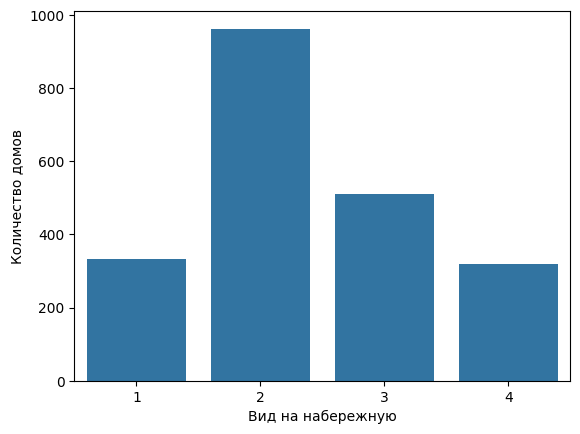

In [90]:
views = df['view'].value_counts()
sns.barplot(x=views.index[1:], y=views.values[1:])

plt.xlabel('Вид на набережную')
plt.ylabel('Количество домов')
plt.show()

Уже лучше, теперь стало видно распределение оценок

2. Изучите распределение этажей домов

In [91]:
floors = df['floors'].value_counts()
floors

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

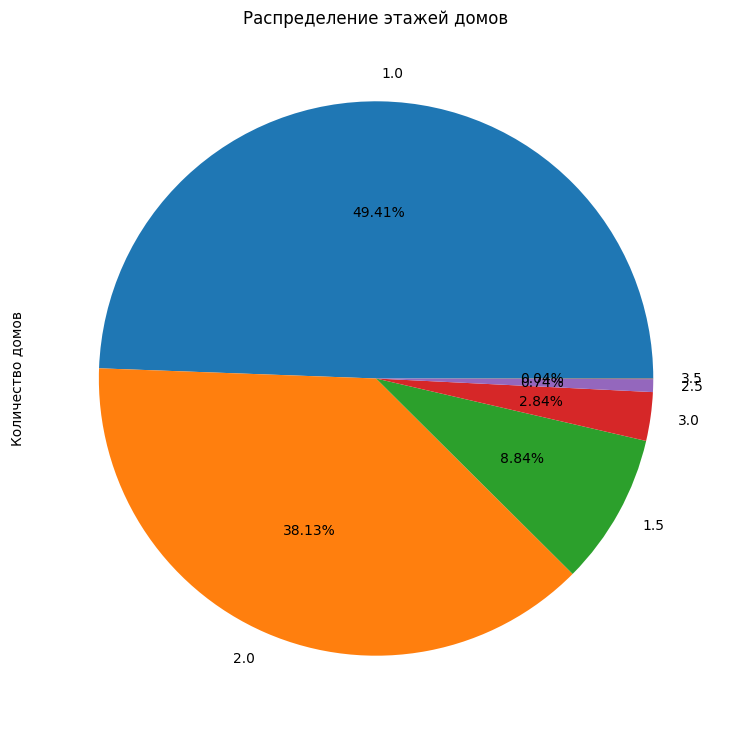

In [92]:
plt.figure(figsize=(20, 9))

floors.plot(kind='pie', labels=floors.index, autopct='%.2f%%')

plt.title("Распределение этажей домов")
plt.ylabel("Количество домов")
plt.show()

3. Изучите распределение состояния домов

In [93]:
conditions = df['condition'].value_counts()
conditions

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

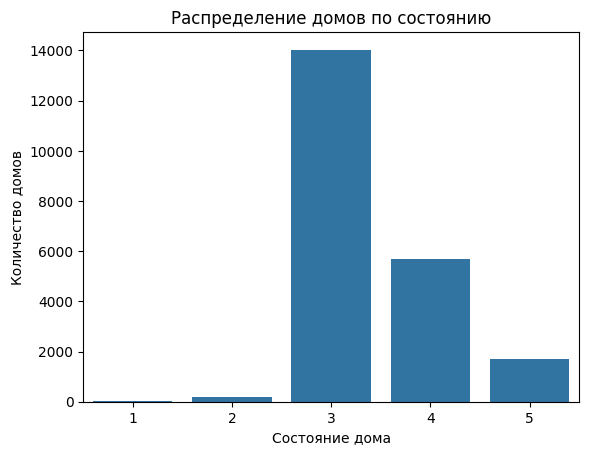

In [94]:
sns.barplot(x=conditions.index, y=conditions.values)

plt.ylabel("Количество домов")
plt.xlabel("Состояние дома")
plt.title("Распределение домов по состоянию")
plt.show()

Выводы: <br>
1. Самая частые дома в выборке - дома без вида на набережную, среднего уровня по состоянию (оценка 3) и имеющих 1-2 этажа<br>
2. Мало домов с оценкой по состоянию меньше 3<br>
3. Мало домов, где 3 и больше этажей<br>
4. Среди домов, у которых есть набережная. Самая популярная оценка вида - 2.<br>

<h1>Задание 3</h1>

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости

Построим матрицу корелляций

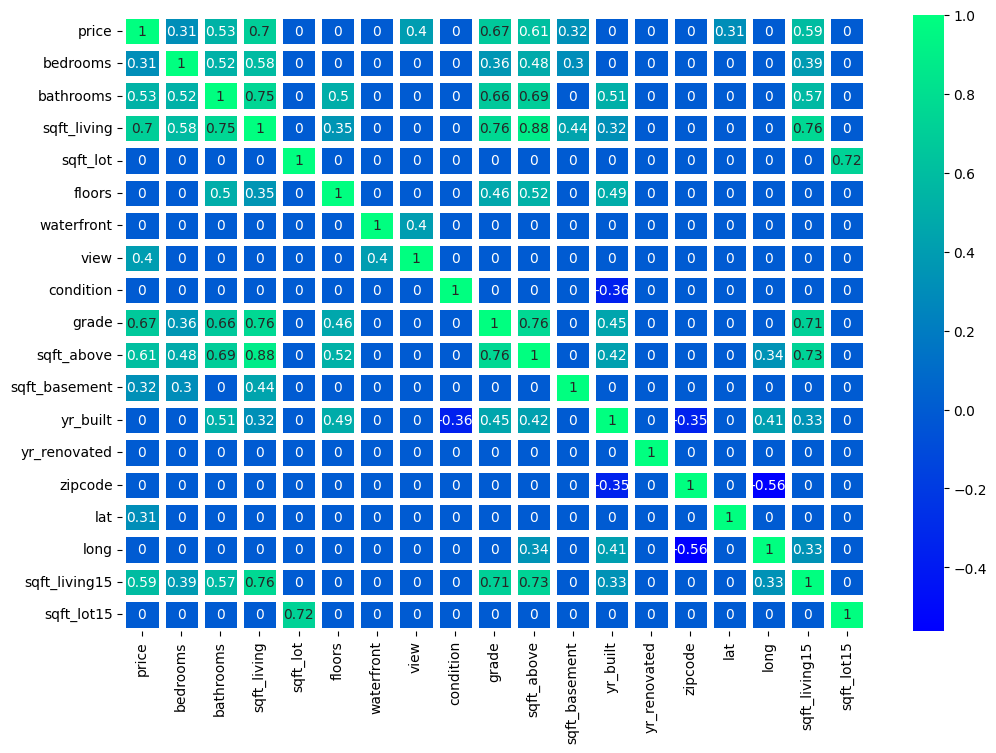

In [95]:
df_corr = df.copy().drop(columns=['id', 'date']).corr()
df_corr = round(df_corr, 2)
df_corr[np.abs(df_corr) < 0.3] = 0

plt.figure(figsize=(12, 8))

sns.heatmap(df_corr, annot=True, linewidths=5, cmap='winter')

plt.show()

Из матрицы можем сделать выводы о том, что цена имеет прямую корелляцию с: <br>
1. Кол-во ванных комнат<br>
2. Кв. метры жилые<br>
3. grade<br>
4. Кв. метры дома, которые находятся выше земли<br>
5. Кв. метры общей площади у 15 соседей<br>

- Ключевым фактором будет являться количество квадратных метров у жилья<br>


id - Уникальный ID для каждого дома<br>
date - Дата продажи дома<br>
price - Стоимость продажи дома<br>
bedrooms - Кол-во спален<br>
bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)<br>
sqft_living - Кв. метры жилые<br>
sqft_lot - Кв. метры общие<br>
floors - Кол-во этажей<br>
waterfront - Есть набержная или нет<br>
view - Значение от 0 до 4 насколько хороший вид<br>
condition - Значение от 1 до 5 насколько хорошее состояние<br>
grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна<br>
sqft_above - Кв. метры дома, которые находятся выше земли<br>
sqft_basement - Кв. метры дома, которые находятся ниже земли<br>
yr_built - Год постройки дома<br>
yr_renovated - Год ремонта дома<br>
zipcode - Индекс<br>
lat - Широтма<br>
long - Долгота<br>
sqft_living15 - Кв. метры жилой площади у 15 соседей<br>
sqft_lot15 - Кв. метры общей площади у 15 соседей<br>

Построим график для связи цены с количеством ванных комнат

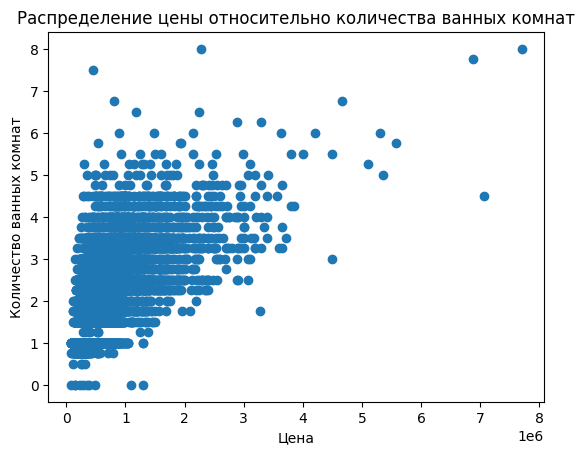

In [96]:
plt.scatter(x=df['price'], y=df['bathrooms'])

plt.ylabel("Количество ванных комнат")
plt.xlabel("Цена")
plt.title("Распределение цены относительно количества ванных комнат")
plt.show()

Слабая линейная корелляция

Построим график для связи цены с квадратными метрами (жилыми)

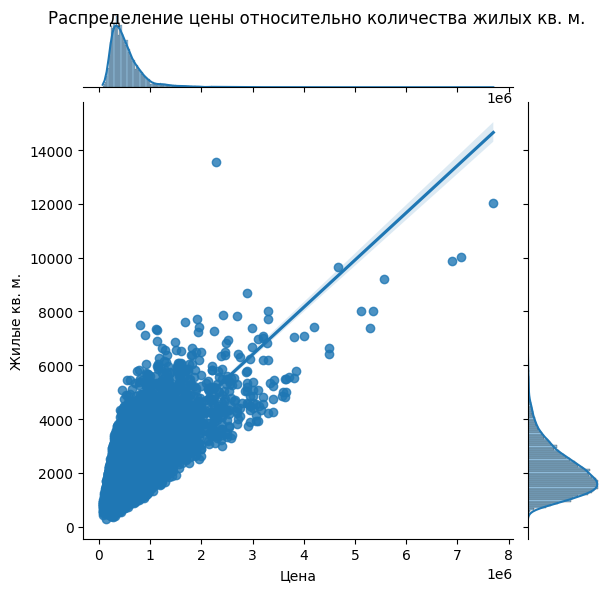

In [97]:
grid = sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')

plt.ylabel("Жилые кв. м.")
plt.xlabel("Цена")
plt.suptitle("Распределение цены относительно количества жилых кв. м.")
plt.show()

Уже лучше, полезный признак

Построим график для связи цены с grade

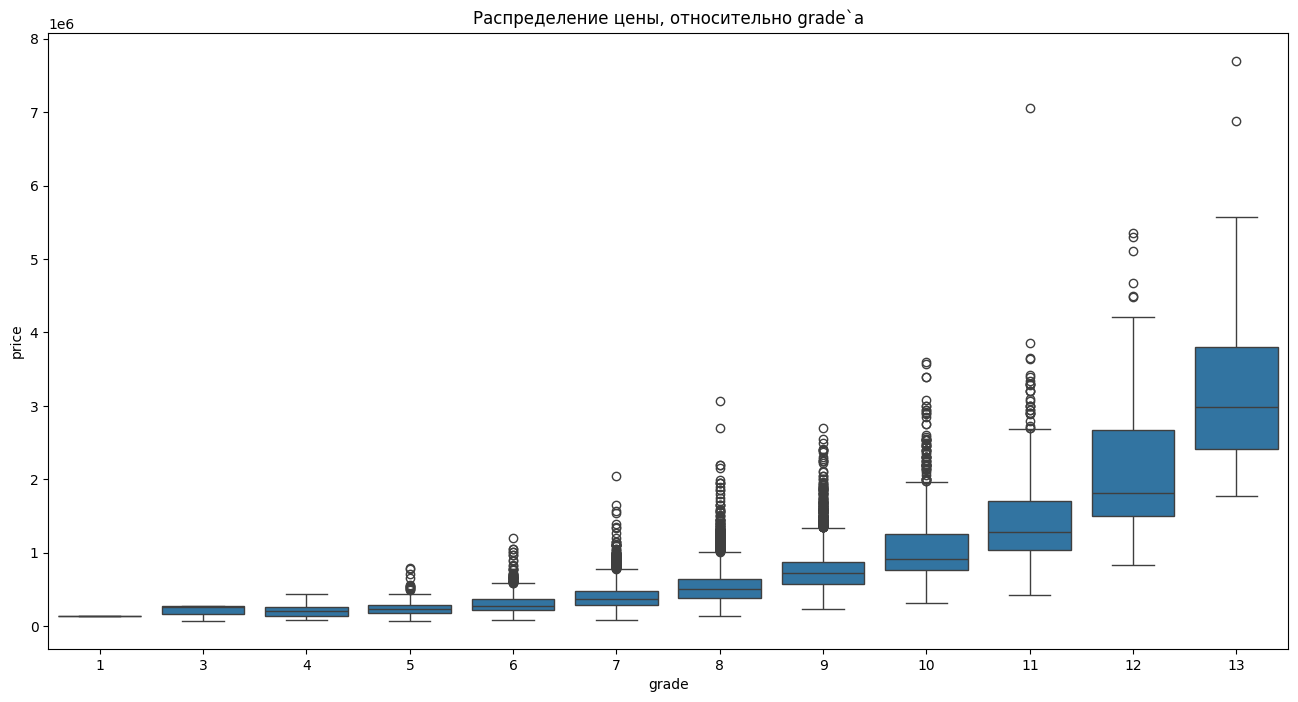

In [98]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['grade'], y=df['price'], whis=1.5)

plt.xlabel('grade')
plt.ylabel('price')
plt.title('Распределение цены, относительно grade`a')
plt.show()

Явно полезный признак. Пока тяжело сказать, линейная тут зависимость6 или нет

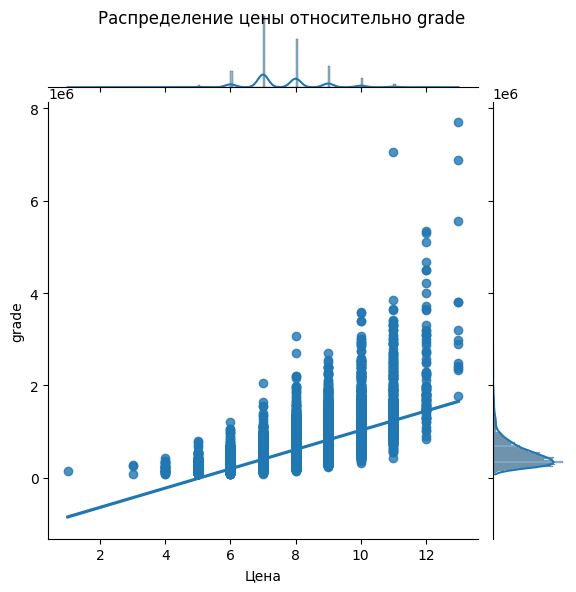

In [99]:
grid = sns.jointplot(x=df['grade'], y=df['price'], kind='reg')

plt.ylabel("grade")
plt.xlabel("Цена")
plt.suptitle("Распределение цены относительно grade")
plt.show()

Есть что-то отдаленно напоминающее регрессию

Таким образом - полезными фичами для прогнозирвоания стоимости можно назвать: кв. м. жилой площади и оценку (grade). Остальные фичи тоже имеют влияние, но уже не столь сильное(судя по матрице корелляций)